# **Final Project Machine Learning & Data Mining**
- 5054231009: Rafif Fawwaz Kartika
- 5054231015: Dimas Ahmad Satrio Wicaksono
- 5054231022: Naufal Humam Maulana

# **Analisis Performa Algoritma Klasifikasi dan Teknik Boosting dalam Prediksi Resiko COVID-19 pada Pasien dengan Komorbiditas Jantung**

Notebook ini dibuat untuk memprediksi penyakit COVID-19 menggunakan dataset Komorbiditas Penyakit Jantung Pasien. Tujuannya adalah untuk melatih model pembelajaran mesin dan melakukan analisis data mining. Dataset ini terdiri dari 35 kolom dan dapat digunakan untuk memprediksi variabel *Covidpos* berdasarkan data individu setiap pasien.

## **Penjelasan Singkat Setiap Kolom dalam Dataset**

1. **PatientID**: ID unik untuk setiap pasien.  
2. **State**: Negara bagian tempat pasien tinggal.  
3. **Sex**: Jenis kelamin pasien (*Male/Female*).  
4. **GeneralHealth**: Kondisi kesehatan umum pasien (*Excellent, Very Good, Good, Fair, Poor*).  
5. **AgeCategory**: Kategori usia pasien.  
6. **HeightInMeters**: Tinggi badan pasien dalam meter.  
7. **WeightInKilograms**: Berat badan pasien dalam kilogram.  
8. **BMI**: Indeks Massa Tubuh (IMT) pasien, dihitung berdasarkan tinggi dan berat badan.  
9. **HadHeartAttack**: Riwayat serangan jantung (*Yes/No*).  
10. **HadAngina**: Riwayat angina atau nyeri dada (*Yes/No*).  
11. **HadStroke**: Riwayat stroke (*Yes/No*).  
12. **HadAsthma**: Riwayat asma (*Yes/No*).  
13. **HadSkinCancer**: Riwayat kanker kulit (*Yes/No*).  
14. **HadCOPD**: Riwayat Penyakit Paru Obstruktif Kronik (COPD) (*Ya/Tidak*).  
15. **HadDepressiveDisorder**: Riwayat gangguan depresi (*Ya/Tidak*).  
16. **HadKidneyDisease**: Riwayat penyakit ginjal (*Yes/No*).  
17. **HadArthritis**: Riwayat radang sendi (arthritis) (*Yes/No*).  
18. **HadDiabetes**: Riwayat diabetes.  
19. **DeafOrHardOfHearing**: Kesulitan mendengar atau tuli (*Yes/No*).  
20. **BlindOrVisionDifficulty**: Kesulitan melihat atau kebutaan (*Yes/No*).  
21. **DifficultyConcentrating**: Kesulitan berkonsentrasi (*Yes/No*).  
22. **DifficultyWalking**: Kesulitan berjalan (*Yes/No*).  
23. **DifficultyDressingBathing**: Kesulitan berpakaian atau mandi (*Yes/No*).  
24. **DifficultyErrands**: Kesulitan menjalankan tugas sehari-hari (*Yes/No*).  
25. **SmokerStatus**: Status kebiasaan merokok pasien.  
26. **ECigaretteUsage**: Penggunaan rokok elektronik.  
27. **ChestScan**: Pernah menjalani scan dada (*Yes/No*).  
28. **RaceEthnicityCategory**: Kategori ras atau etnis pasien.  
29. **AlcoholDrinkers**: Konsumsi alkohol (*Yes/No*).  
30. **HIVTesting**: Riwayat tes HIV (*Yes/No*).  
31. **FluVaxLast12**: Mendapat vaksin flu dalam 12 bulan terakhir (*Yes/No*).  
32. **PneumoVaxEver**: Pernah mendapat vaksin pneumonia (*Yes/No*).  
33. **TetanusLast10Tdap**: Mendapat vaksin tetanus dalam 10 tahun terakhir.  
34. **HighRiskLastYear**: Risiko tinggi terkena penyakit serius dalam setahun terakhir (*Yes/No*).  
35. **CovidPos**: Hasil tes COVID-19 positif (*Positive/Negative*). **[Target Kolom]**

# **Install and Import Package**

In [ ]:
!pip install catboost

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


# **Preparation Data**

In [ ]:
# Membaca dataset
dataset = pd.read_excel('./dataset/Patients Data ( Used for Heart Disease Prediction ).xlsx')

In [ ]:
dataset.shape

(237630, 35)

In [ ]:
# Cek data duplikat
duplicated = dataset.duplicated().sum()
print(duplicated)

0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  237630 non-null  int64  
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  object 
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD                    23

In [ ]:
for column in ["HadDiabetes", "SmokerStatus", "ECigaretteUsage", "TetanusLast10Tdap"]:
    print(dataset[column].value_counts())
    print("\n")

HadDiabetes
No                                         197463
Yes                                         33055
No, pre-diabetes or borderline diabetes      5211
Yes, but only during pregnancy (female)      1901
Name: count, dtype: int64


SmokerStatus
Never smoked                             142390
Former smoker                             66193
Current smoker - now smokes every day     21148
Current smoker - now smokes some days      7899
Name: count, dtype: int64


ECigaretteUsage
Never used e-cigarettes in my entire life    183446
Not at all (right now)                        41963
Use them some days                             6468
Use them every day                             5753
Name: count, dtype: int64


TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    79370
Yes, received tetanus shot but not sure what type            71538
Yes, received Tdap                                           67418
Yes, received tetanus shot, but not Tdap                

In [ ]:
# Fungsi untuk mengubah nilai kolom ke Yes/No
def categorize(column, values):
    return column.apply(lambda x: "Yes" if x in values else "No")

values = {
    "HadDiabetes": ["Yes", "Yes, but only during pregnancy (female)"],
    "SmokerStatus": ["Current smoker - now smokes every day", "Current smoker - now smokes some days"],
    "ECigaretteUsage": ["Use them some days", "Use them every day"],
    "TetanusLast10Tdap": [
        "Yes, received tetanus shot but not sure what type",
        "Yes, received Tdap",
        "Yes, received tetanus shot, but not Tdap"
    ]
}

for column, vals in values.items():
    dataset[column] = categorize(dataset[column], vals)

In [ ]:
# Mengubah nilai kolom [0, 1] menjadi [0: No, 1: Yes]
cols1 = [
    'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer',
    'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
    'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating',
    'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
    'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
    'PneumoVaxEver', 'HighRiskLastYear'
]

for col in cols1:
    if col in dataset.columns:
        dataset[col] = dataset[col].replace({0: 'No', 1: 'Yes'})

# Mengubah nilai kolom [1, 0] menjadi [1: Positive, 0: Negative]
cols2 = ['CovidPos']

for col in cols2:
    if col in dataset.columns:
        dataset[col] = dataset[col].replace({1: 'Positive', 0: 'Negative'})

In [ ]:
dataset.head(10)

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,No,Yes,...,No,Yes,"White only, Non-Hispanic",No,No,No,Yes,No,No,Positive
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,No,No,...,No,No,"White only, Non-Hispanic",No,No,Yes,Yes,Yes,No,Negative
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,No,No,...,No,No,"White only, Non-Hispanic",Yes,No,No,No,Yes,No,Negative
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,No,No,...,No,No,"White only, Non-Hispanic",No,No,Yes,Yes,Yes,No,Negative
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,No,No,...,No,Yes,"Black only, Non-Hispanic",No,No,Yes,No,No,No,Negative
5,6,Alabama,Male,Very good,Age 75 to 79,1.85,108.860001,31.660000,No,No,...,No,Yes,"White only, Non-Hispanic",Yes,No,No,Yes,No,No,Positive
6,7,Alabama,Female,Good,Age 70 to 74,1.70,74.839996,25.840000,No,No,...,No,Yes,"Black only, Non-Hispanic",Yes,No,No,No,No,No,Negative
7,8,Alaska,Female,Fair,Age 60 to 64,1.70,87.540001,30.230000,No,No,...,No,No,"Black only, Non-Hispanic",No,No,No,Yes,No,No,Negative
8,9,Alabama,Female,Fair,Age 80 or older,1.70,90.720001,31.320000,No,No,...,No,No,"White only, Non-Hispanic",No,No,Yes,Yes,No,No,Positive
9,10,Alabama,Female,Good,Age 80 or older,1.55,79.379997,33.070000,No,No,...,No,No,"White only, Non-Hispanic",No,No,Yes,Yes,No,No,Negative


In [ ]:
dataset.nunique()

,0
PatientID,237630
State,54
Sex,2
GeneralHealth,5
AgeCategory,13
HeightInMeters,101
WeightInKilograms,513
BMI,3503
HadHeartAttack,2
HadAngina,2


In [ ]:
# Mengambil 100,000 baris pertama
subset_data = dataset.iloc[:100000]

subset_data.to_csv('./dataset/subset_dataset.csv', index=False)

In [ ]:
# Membaca data subset
data = pd.read_csv('./dataset/subset_dataset.csv')

In [ ]:
# Membagi data subset (80% untuk train dan 20% untuk test)
train_size = int(0.8 * len(data))

train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

train_data.to_csv('./dataset/train_dataset.csv', index=False)
test_data.to_csv('./dataset/test_dataset.csv', index=False)

In [ ]:
# Membaca data train dan test
train = pd.read_csv('./dataset/train_dataset.csv')
test = pd.read_csv('./dataset/test_dataset.csv')

# **Exploratory Data Analysis**

In [ ]:
data.head(10)

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,No,Yes,...,No,Yes,"White only, Non-Hispanic",No,No,No,Yes,No,No,Positive
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,No,No,...,No,No,"White only, Non-Hispanic",No,No,Yes,Yes,Yes,No,Negative
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,No,No,...,No,No,"White only, Non-Hispanic",Yes,No,No,No,Yes,No,Negative
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,No,No,...,No,No,"White only, Non-Hispanic",No,No,Yes,Yes,Yes,No,Negative
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,No,No,...,No,Yes,"Black only, Non-Hispanic",No,No,Yes,No,No,No,Negative
5,6,Alabama,Male,Very good,Age 75 to 79,1.85,108.860001,31.660000,No,No,...,No,Yes,"White only, Non-Hispanic",Yes,No,No,Yes,No,No,Positive
6,7,Alabama,Female,Good,Age 70 to 74,1.70,74.839996,25.840000,No,No,...,No,Yes,"Black only, Non-Hispanic",Yes,No,No,No,No,No,Negative
7,8,Alaska,Female,Fair,Age 60 to 64,1.70,87.540001,30.230000,No,No,...,No,No,"Black only, Non-Hispanic",No,No,No,Yes,No,No,Negative
8,9,Alabama,Female,Fair,Age 80 or older,1.70,90.720001,31.320000,No,No,...,No,No,"White only, Non-Hispanic",No,No,Yes,Yes,No,No,Positive
9,10,Alabama,Female,Good,Age 80 or older,1.55,79.379997,33.070000,No,No,...,No,No,"White only, Non-Hispanic",No,No,Yes,Yes,No,No,Negative


In [ ]:
data.shape

(100000, 35)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  100000 non-null  int64  
 1   State                      100000 non-null  object 
 2   Sex                        100000 non-null  object 
 3   GeneralHealth              100000 non-null  object 
 4   AgeCategory                100000 non-null  object 
 5   HeightInMeters             100000 non-null  float64
 6   WeightInKilograms          100000 non-null  float64
 7   BMI                        100000 non-null  float64
 8   HadHeartAttack             100000 non-null  object 
 9   HadAngina                  100000 non-null  object 
 10  HadStroke                  100000 non-null  object 
 11  HadAsthma                  100000 non-null  object 
 12  HadSkinCancer              100000 non-null  object 
 13  HadCOPD                    100

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,100000.0,50000.500000,28867.657797,1.00,25000.750000,50000.500000,75000.25,100000.000000
HeightInMeters,100000.0,1.704203,0.107157,0.91,1.630000,1.700000,1.78,2.360000
WeightInKilograms,100000.0,83.263699,21.309960,29.48,68.040001,81.650002,95.25,292.570007
BMI,100000.0,28.578461,6.511902,12.16,24.200001,27.440001,31.75,97.650002


In [ ]:
data.columns

Index(['PatientID', 'State', 'Sex', 'GeneralHealth', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [ ]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Variables: \n", cat_cols, "\n")
print("Numerical Variables: \n", num_cols, "\n")

Categorical Variables: 
 ['State', 'Sex', 'GeneralHealth', 'AgeCategory', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'] 

Numerical Variables: 
 ['PatientID', 'HeightInMeters', 'WeightInKilograms', 'BMI'] 



In [ ]:
data.nunique()

,0
PatientID,100000
State,37
Sex,2
GeneralHealth,5
AgeCategory,13
HeightInMeters,88
WeightInKilograms,453
BMI,2931
HadHeartAttack,2
HadAngina,2


In [ ]:
for i in data.columns:
    if (data[i].nunique() < 100):
        print ("Feature:\t", i, "\n", data[i].unique(), "\n")

Feature:	 State 
 ['Alabama' 'Alaska' 'Arizona' 'California' 'Arkansas' 'Connecticut'
 'Colorado' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Indiana'
 'District of Columbia' 'Kansas' 'Iowa' 'Maryland' 'Minnesota' 'Montana'
 'New Jersey' 'Nebraska' 'New York' 'Ohio' 'Oklahoma' 'Texas' 'Vermont'
 'Washington' 'Utah' 'Illinois' 'West Virginia' 'Virginia' 'Massachusetts'
 'Kentucky' 'Louisiana' 'Maine' 'Wisconsin' 'Michigan'] 

Feature:	 Sex 
 ['Female' 'Male'] 

Feature:	 GeneralHealth 
 ['Fair' 'Very good' 'Excellent' 'Good' 'Poor'] 

Feature:	 AgeCategory 
 ['Age 75 to 79' 'Age 65 to 69' 'Age 60 to 64' 'Age 70 to 74'
 'Age 50 to 54' 'Age 80 or older' 'Age 55 to 59' 'Age 25 to 29'
 'Age 40 to 44' 'Age 30 to 34' 'Age 35 to 39' 'Age 18 to 24'
 'Age 45 to 49'] 

Feature:	 HeightInMeters 
 [1.63       1.60000002 1.77999997 1.67999995 1.85000002 1.70000005
 1.54999995 1.79999995 1.64999998 1.75       1.57000005 1.73000002
 1.83000004 1.51999998 1.88       1.90999997 1.92999995 1.5
 1.98

In [ ]:
cols_plot = ['Sex', 'GeneralHealth', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands',
       'ChestScan', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12',
       'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos']
color_palette = sns.color_palette("Set1", len(cols_plot))

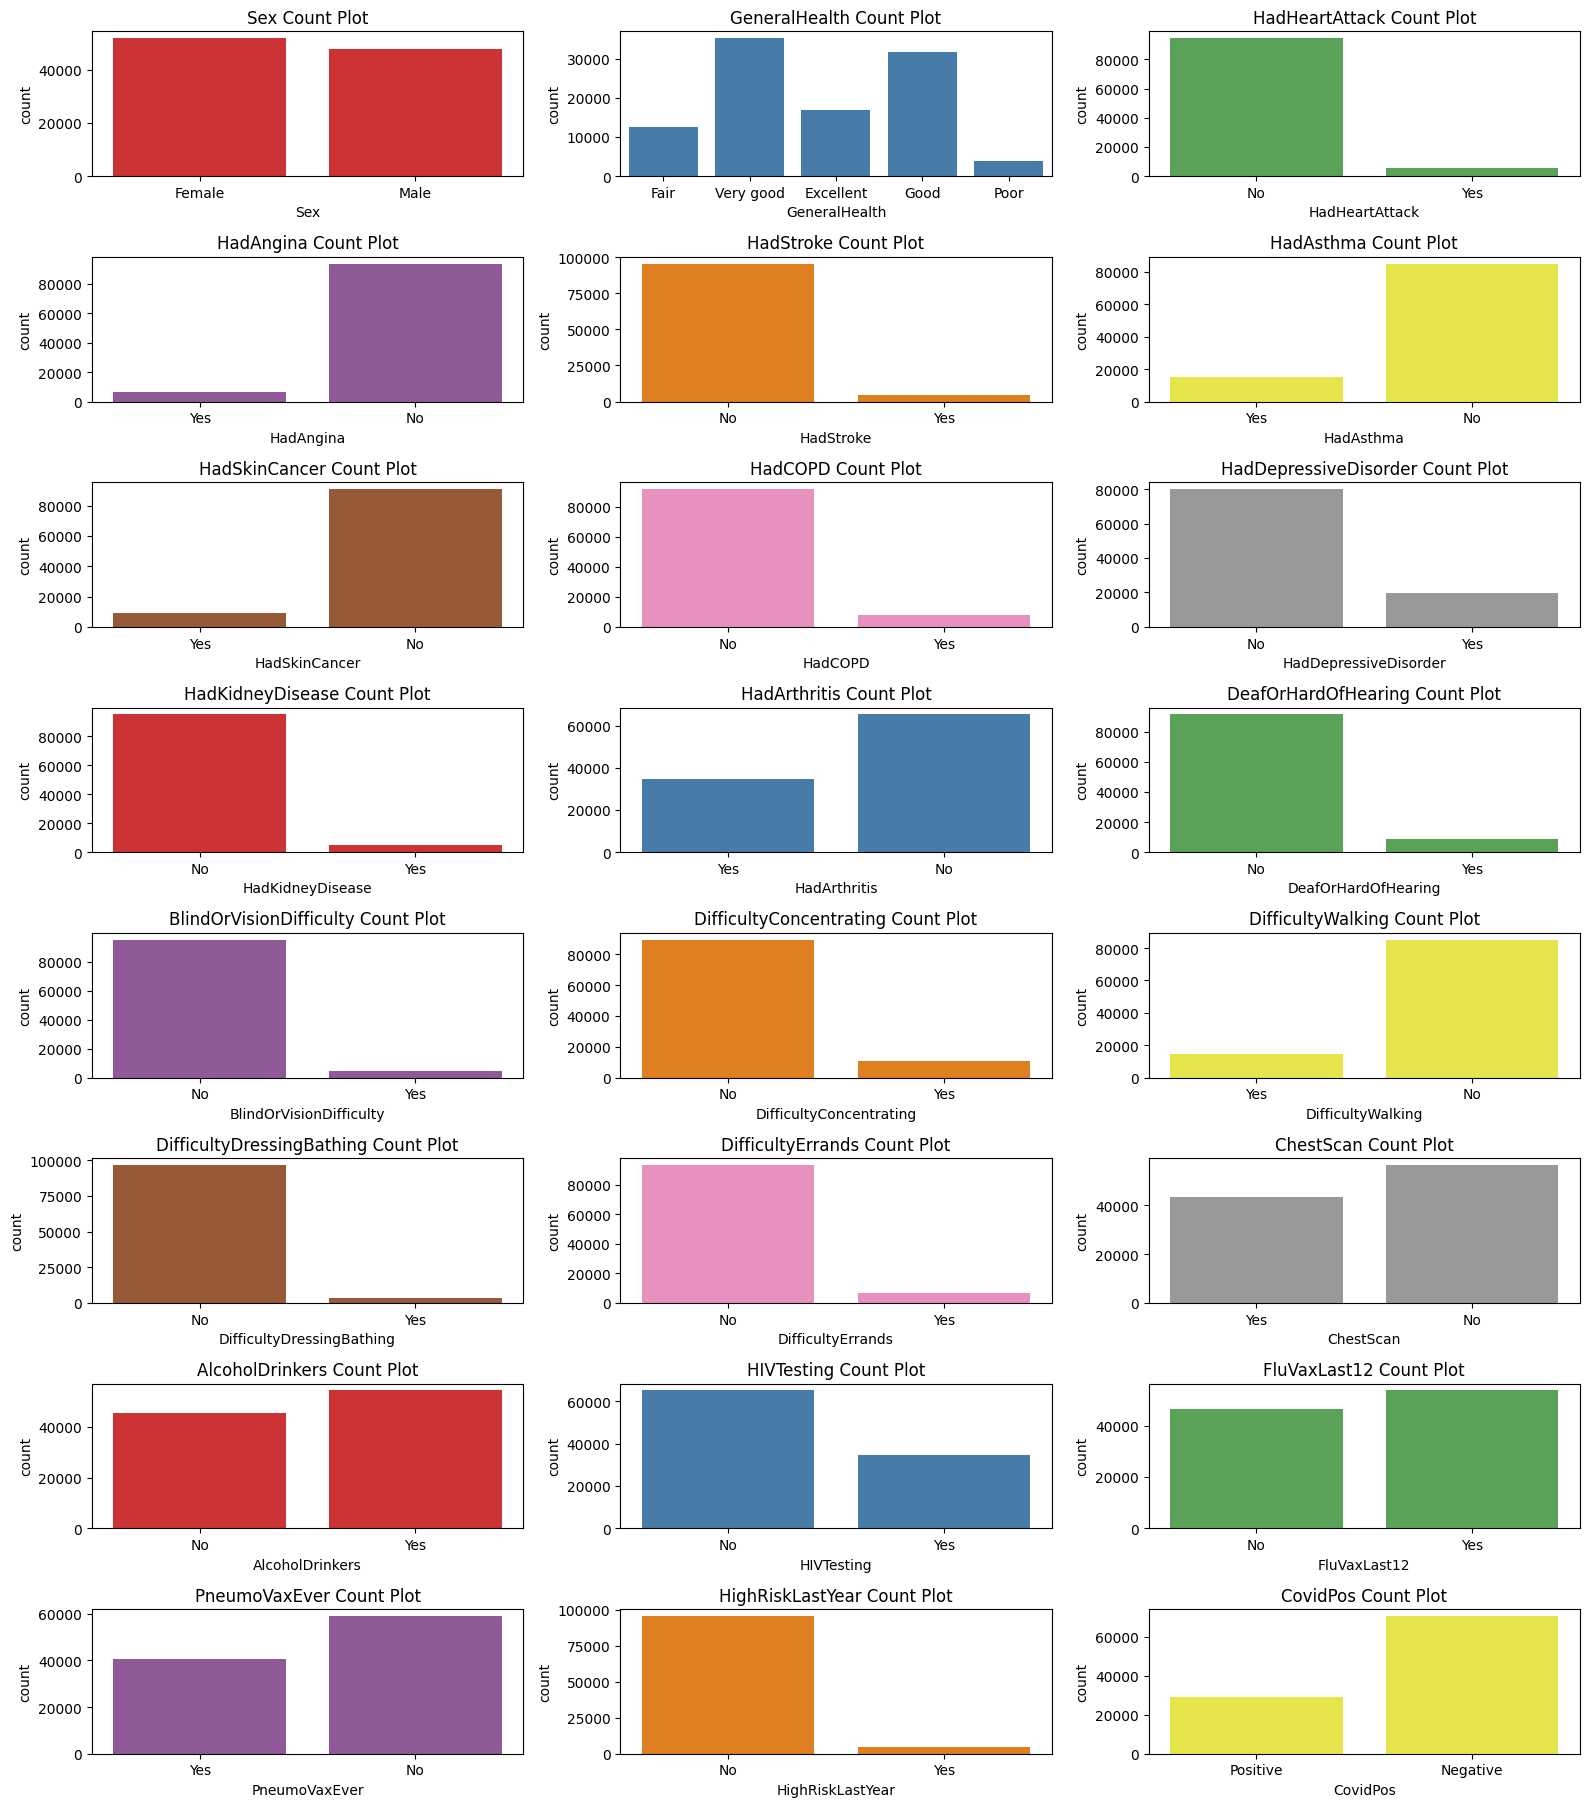

In [ ]:
# Count Plot
plt.figure(figsize=(16, 20))
for i, column in enumerate(cols_plot, 1):
    plt.subplot((len(cols_plot)//3)+1, 3, i)
    sns.countplot(data=data, x=column, color=color_palette[i - 1])
    plt.xlabel(column)
    plt.title(f'{column} Count Plot')
plt.tight_layout()
plt.show()

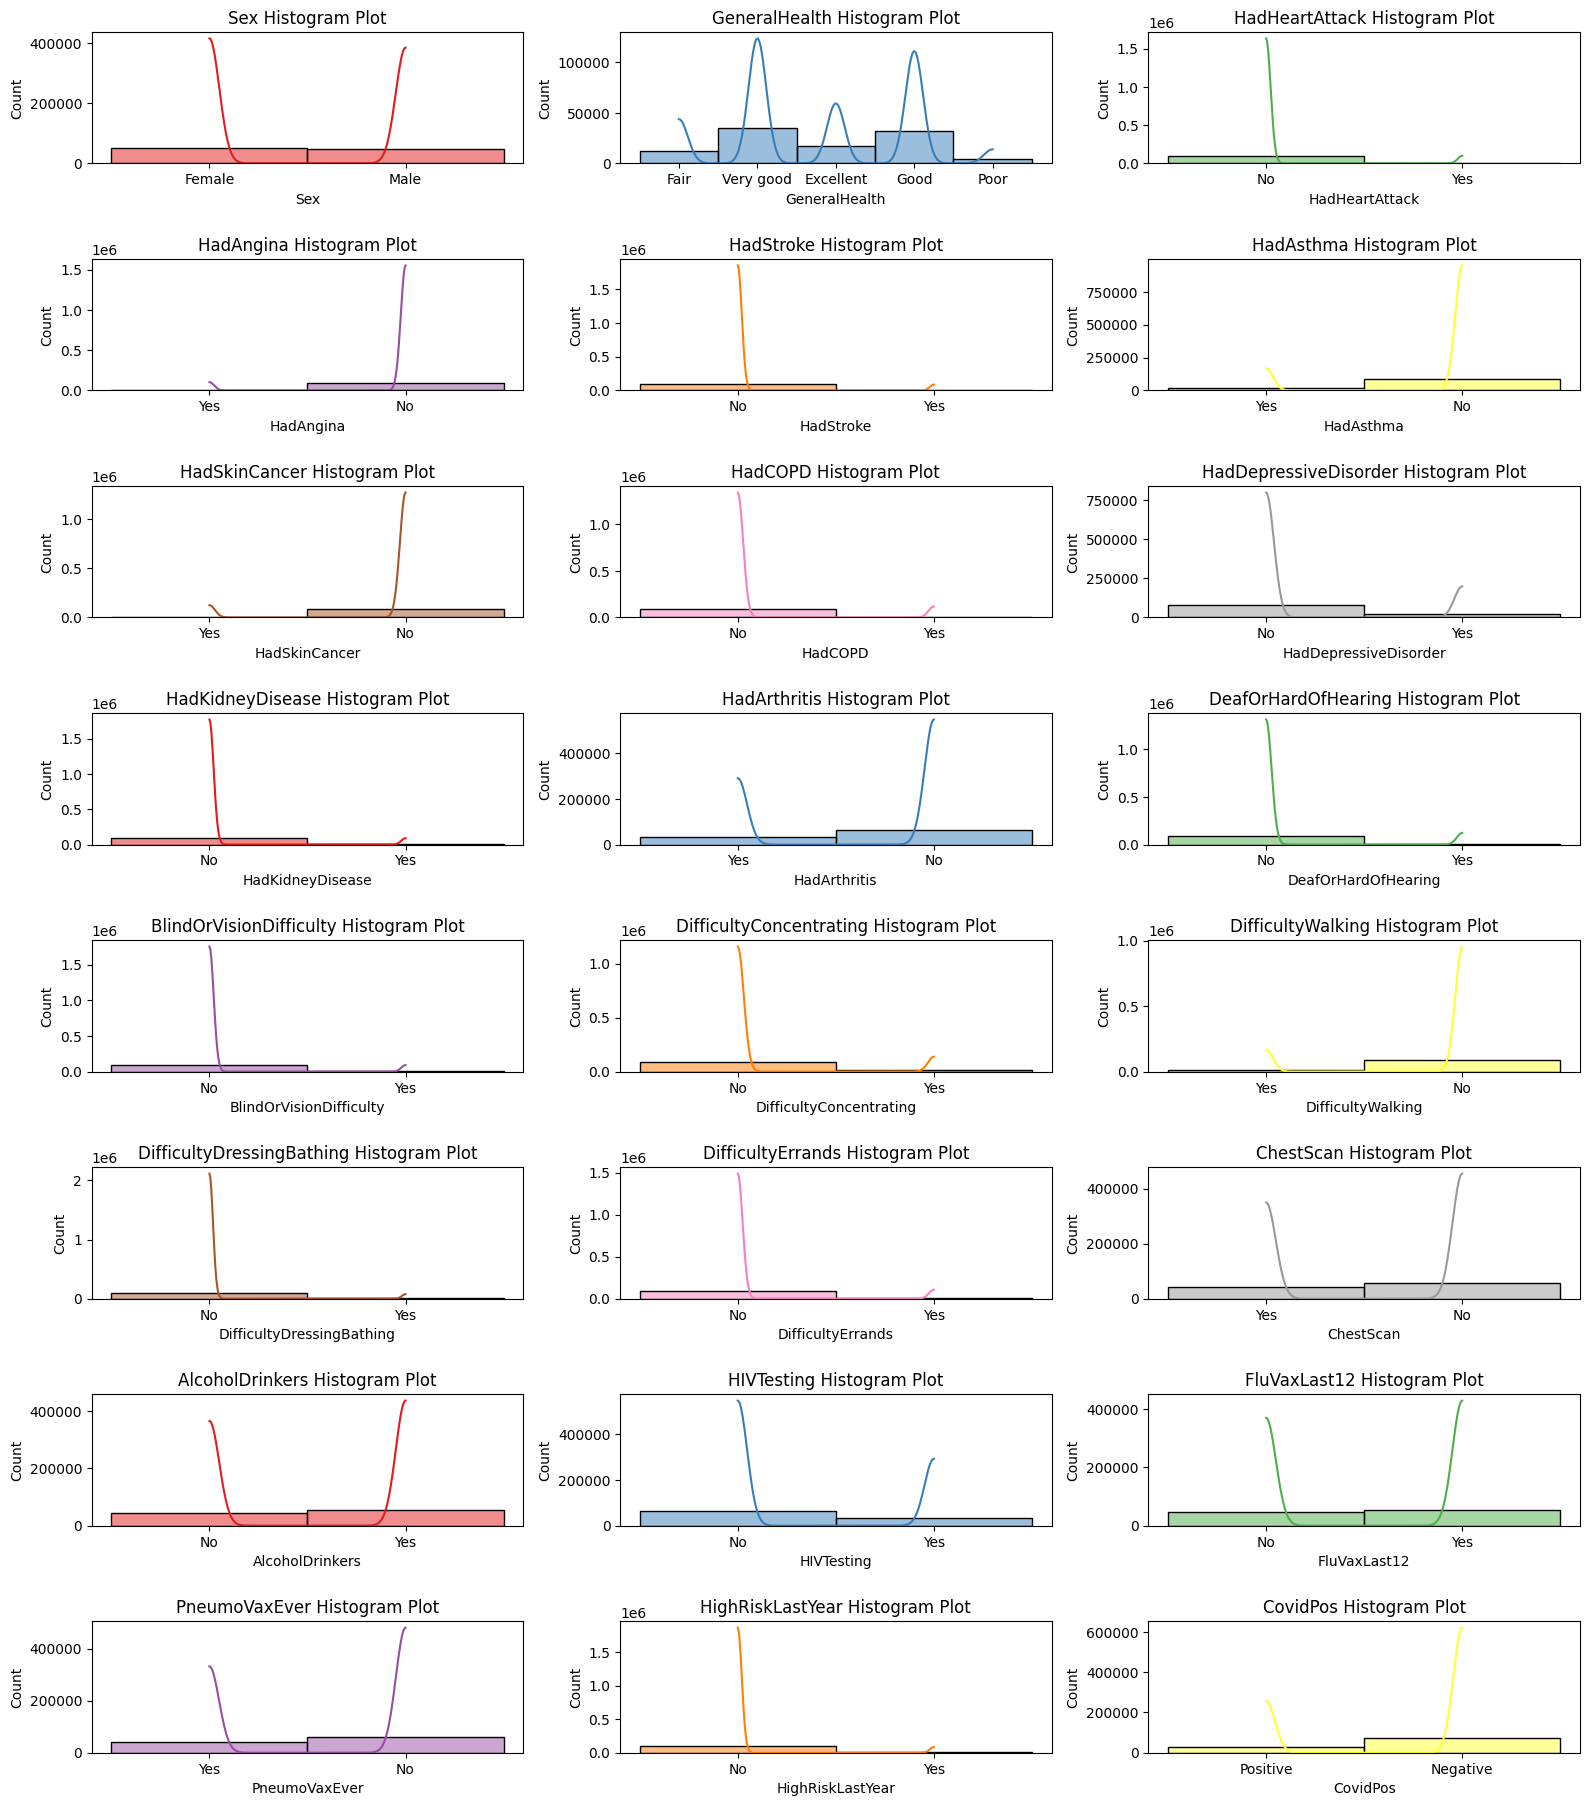

In [ ]:
# Histogram Plot
plt.figure(figsize=(16, 20))
for i, column in enumerate(cols_plot, 1):
    plt.subplot((len(cols_plot)//3)+1, 3, i)
    sns.histplot(data=data, x=column, color=color_palette[i - 1], kde=True)
    plt.xlabel(column)
    plt.title(f'{column} Histogram Plot')
plt.tight_layout()
plt.show()

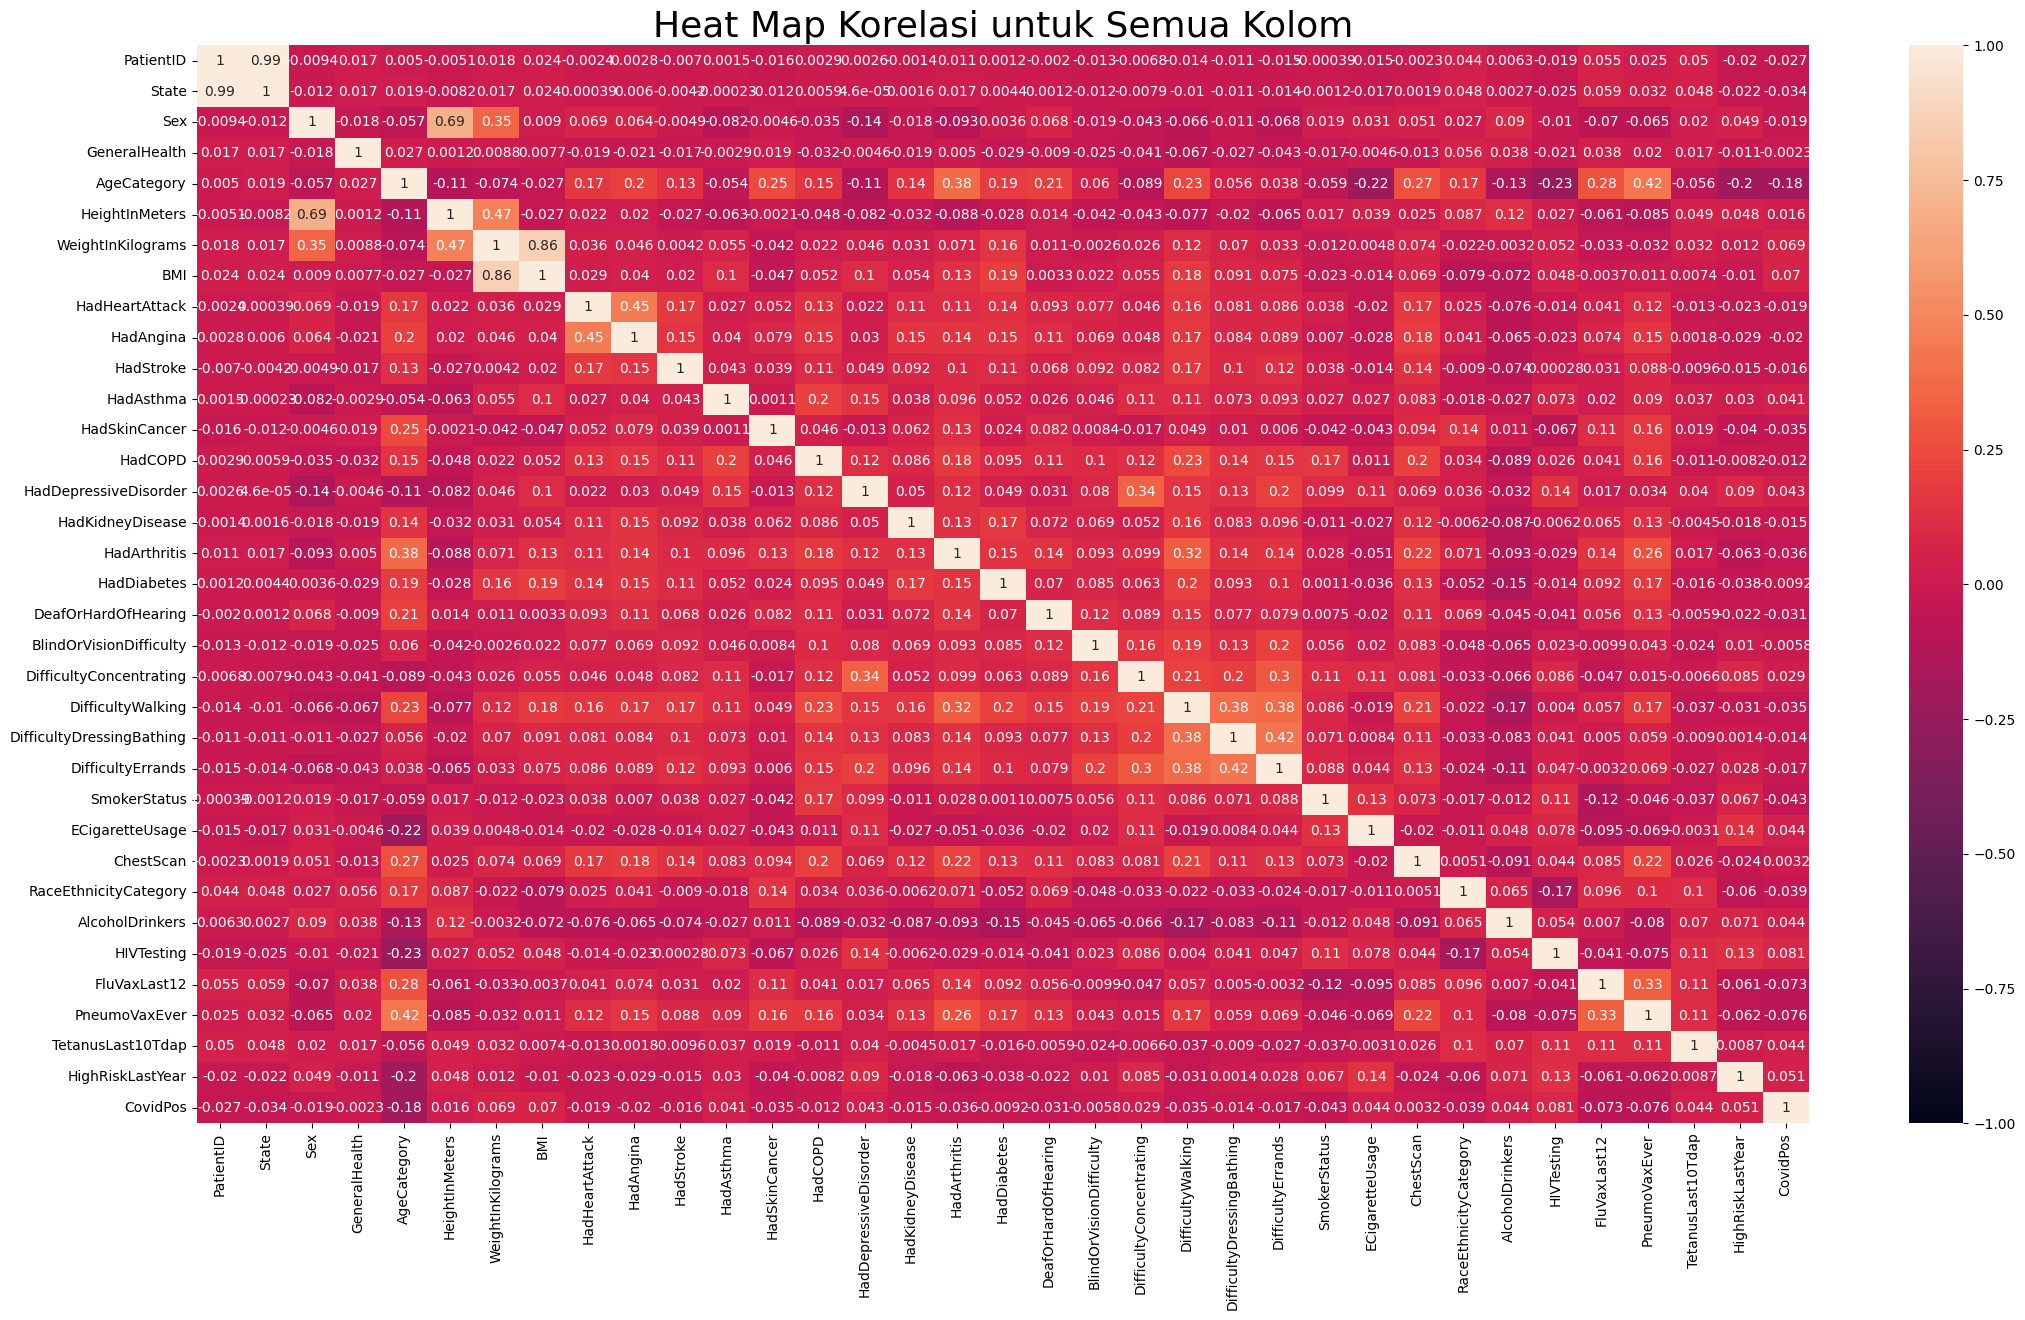

In [ ]:
# Heat Map
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

correlation_matrix = data.corr()

plt.figure(figsize=(26, 14))
sns.heatmap(correlation_matrix, annot = True, vmin = -1, vmax = 1)
plt.title(f'Heat Map Korelasi untuk Semua Kolom', fontsize=26)
plt.show()

In [ ]:
target_corr = correlation_matrix['CovidPos'].sort_values(ascending=False)
print("Korelasi dengan kolom CovidPos: \n", target_corr)

Korelasi dengan kolom CovidPos: 
 CovidPos                     1.000000
HIVTesting                   0.080644
BMI                          0.070278
WeightInKilograms            0.069175
HighRiskLastYear             0.050782
TetanusLast10Tdap            0.044470
ECigaretteUsage              0.044420
AlcoholDrinkers              0.043601
HadDepressiveDisorder        0.042584
HadAsthma                    0.041457
DifficultyConcentrating      0.028820
HeightInMeters               0.016499
ChestScan                    0.003179
GeneralHealth               -0.002265
BlindOrVisionDifficulty     -0.005775
HadDiabetes                 -0.009244
HadCOPD                     -0.012372
DifficultyDressingBathing   -0.014104
HadKidneyDisease            -0.014978
HadStroke                   -0.016302
DifficultyErrands           -0.017078
HadHeartAttack              -0.019098
Sex                         -0.019249
HadAngina                   -0.020246
PatientID                   -0.026909
DeafOrHardOfHear

# **Preprocessing Data**

In [ ]:
train_df = train.copy()
test_df = test.copy()

In [ ]:
full = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [ ]:
full.shape

(100000, 35)

## Missing Value

In [ ]:
missing_value = full.isnull().sum()

missing_value

,0
PatientID,0
State,0
Sex,0
GeneralHealth,0
AgeCategory,0
HeightInMeters,0
WeightInKilograms,0
BMI,0
HadHeartAttack,0
HadAngina,0


## LabelEncoder

In [ ]:
# LabelEncoder
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    full[col] = le.fit_transform(full[col].astype(str))
    label_encoders[col] = le

In [ ]:
full.drop(columns=['PatientID', 'State'], inplace=True)

In [ ]:
full.head(10)

,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,1,11,1.63,84.820000,32.099998,0,1,0,1,...,0,1,4,0,0,0,1,0,0,1
1,0,4,9,1.60,71.669998,27.990000,0,0,0,0,...,0,0,4,0,0,1,1,1,0,0
2,1,0,8,1.78,71.209999,22.530001,0,0,0,0,...,0,0,4,1,0,0,0,1,0,0
3,1,4,10,1.78,95.250000,30.129999,0,0,0,0,...,0,0,4,0,0,1,1,1,0,0
4,0,2,6,1.68,78.019997,27.760000,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,1,4,11,1.85,108.860001,31.660000,0,0,0,0,...,0,1,4,1,0,0,1,0,0,1
6,0,2,10,1.70,74.839996,25.840000,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7,0,1,8,1.70,87.540001,30.230000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,1,12,1.70,90.720001,31.320000,0,0,0,0,...,0,0,4,0,0,1,1,0,0,1
9,0,2,12,1.55,79.379997,33.070000,0,0,0,0,...,0,0,4,0,0,1,1,0,0,0


In [ ]:
X = full.drop(columns=['CovidPos'])
y = full['CovidPos']
rs = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)

## StandardScaler

In [ ]:
# StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
# X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

































## PCA

In [ ]:
# PCA dengan target 95% dari total variansi
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

X_train = pd.DataFrame(X_train_pca)
X_test = pd.DataFrame(X_test_pca)

print(f"Data train setelah PCA: {X_train_pca.shape}")
print(f"Data test setelah PCA: {X_test_pca.shape}")
print(f"Jumlah komponen dipilih: {pca.n_components_}")

Data train setelah PCA: (80000, 28)
Data test setelah PCA: (20000, 28)
Jumlah komponen dipilih: 28


In [ ]:
# pca_data = pd.DataFrame(X_train_pca)
# pca_data.to_csv('./dataset/train_pca.csv', index=False)

In [ ]:
# pca_df = pd.read_csv('./dataset/train_pca.csv')

# pca_df.head(10)

In [ ]:
pca_data = pd.DataFrame(X_train_pca)

pca_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-1.639410,-0.715759,-1.271109,0.893287,-2.465287,0.118499,0.385564,-0.000445,0.258644,1.183937,...,-0.340781,0.058577,-0.170934,0.190456,-1.021670,0.346467,0.357159,0.381780,0.076338,0.088129
1,-0.000854,-3.797958,-0.088980,-0.445759,1.807598,-0.964457,-0.242748,0.472499,0.336987,0.997261,...,0.011395,0.799652,0.386275,0.895540,-1.093864,0.354380,0.032210,-0.021998,0.048343,0.133250
2,-0.530410,-1.143563,1.148973,-0.233014,0.665668,0.032872,-0.709896,-0.790480,-0.359753,1.264596,...,-0.547952,-0.624331,0.096132,-1.256634,-1.047811,-0.246684,0.205996,0.382481,-0.127338,0.037003
3,-1.089778,-0.432016,1.752954,-0.179648,-0.076891,-1.270392,0.194097,0.618177,0.741124,-0.700401,...,-0.065435,1.414039,-1.097275,-0.207340,-0.099571,-0.103157,0.329313,-0.655759,-0.072265,0.047138
4,-2.725096,-0.270844,-2.328365,-0.254236,-0.522343,1.169908,-1.327614,-0.534090,-0.801512,1.453566,...,-0.721266,0.631085,0.615046,0.150283,-0.841556,0.869742,0.203130,0.184619,-0.016458,0.208446
5,1.234337,-2.361063,0.412377,1.580004,0.849390,-0.596334,1.527957,0.192631,0.590056,-0.792836,...,-0.103187,0.693890,-0.510982,1.631751,-0.175155,-1.231951,-0.533306,0.002158,0.120329,-0.132175
6,-0.416557,-0.808104,-0.884528,2.092527,-1.124935,1.121046,-0.625530,-1.310682,0.426294,0.661067,...,-0.628023,0.561385,-1.746298,0.381737,-0.318146,-0.103720,-0.860741,0.940965,-0.040341,-0.130007
7,-1.116779,0.280406,-1.458439,-0.258521,-0.767259,-0.547282,2.365564,1.129247,0.151467,0.788523,...,1.089442,0.729214,-0.604114,0.424673,0.135239,-1.044076,1.131772,1.057054,0.187232,0.030740
8,-0.322134,-1.103772,1.867637,-0.422651,0.205585,-0.742328,0.365084,-0.228580,0.133806,1.248589,...,-0.350605,-0.588209,-0.333970,-1.116452,0.418359,-0.450325,-0.475915,0.506823,-0.192923,-0.161025
9,0.105995,-0.985094,0.326906,-0.854679,-1.019231,-1.174710,0.222795,-0.252416,-0.788739,0.777714,...,0.316298,-1.210183,0.950880,-0.383928,0.259652,0.242218,0.442003,-0.469074,-1.053012,-0.104229


# **Modeling Data**

## Classifier Algorithm (Accuracy Score)

In [ ]:
# Classifier Algorithm
classifiers = [
    ("Logistic Regression", LogisticRegression(random_state=rs)),
    ("Decision Tree", DecisionTreeClassifier(random_state=rs)),
    ("Random Forest", RandomForestClassifier(random_state=rs)),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Support Vector Classifier", SVC(kernel='linear', random_state=rs)),
    ("Gaussian Naive Bayes", GaussianNB())
]

results = []

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Algorithm": name,
        "Accuracy": acc,
        "Precision (Weighted)": report["weighted avg"]["precision"],
        "Recall (Weighted)": report["weighted avg"]["recall"],
        "F1-Score (Weighted)": report["weighted avg"]["f1-score"]
    })

acc_res = pd.DataFrame(results)
acc_res.sort_values(by="Accuracy", ascending=False, inplace=True)
acc_res

,Algorithm,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
0,Logistic Regression,0.70715,0.653720,0.70715,0.605258
4,Support Vector Classifier,0.70650,0.499142,0.70650,0.584989
5,Gaussian Naive Bayes,0.69475,0.637229,0.69475,0.633840
2,Random Forest,0.69130,0.623277,0.69130,0.621614
3,K-Nearest Neighbors,0.65940,0.612993,0.65940,0.625943
1,Decision Tree,0.59295,0.600086,0.59295,0.596352


## Boosting (Accuracy Score)

In [ ]:
# Boosting
boosting = [
    ("AdaBoost", AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, random_state=rs)),
    ("Gradient Boosting", GradientBoostingClassifier(learning_rate=0.1, random_state=rs)),
    ("XGBoost", XGBClassifier(learning_rate=0.1, random_state=rs, verbosity=0)),
    ("LightGBM", LGBMClassifier(learning_rate=0.1, random_state=rs, verbose=-1)),
    ("CatBoost", CatBoostClassifier(random_state=rs, verbose=0))
]

results = []

for name, bst in boosting:
    bst.fit(X_train, y_train)
    y_pred = bst.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results.append({
        "Algorithm": name,
        "Accuracy": acc,
        "Precision (Weighted)": report["weighted avg"]["precision"],
        "Recall (Weighted)": report["weighted avg"]["recall"],
        "F1-Score (Weighted)": report["weighted avg"]["f1-score"]
    })

acc_res = pd.DataFrame(results)
acc_res.sort_values(by="Accuracy", ascending=False, inplace=True)
acc_res

,Algorithm,Accuracy,Precision (Weighted),Recall (Weighted),F1-Score (Weighted)
1,Gradient Boosting,0.70775,0.669050,0.70775,0.594420
0,AdaBoost,0.70650,0.499142,0.70650,0.584989
4,CatBoost,0.70565,0.646981,0.70565,0.611686
2,XGBoost,0.70515,0.641149,0.70515,0.604292
3,LightGBM,0.70515,0.637113,0.70515,0.598858


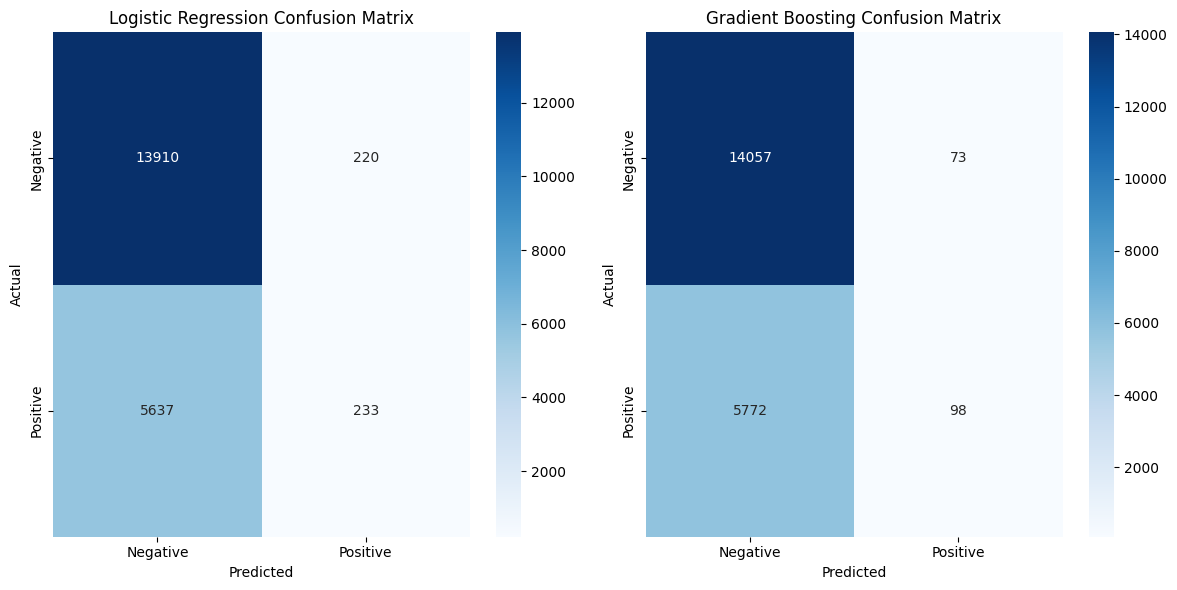

In [ ]:
# Confusion Matrix Logistic Regression vs Gradient Boosting
model1 = LogisticRegression(random_state=rs)
model2 = GradientBoostingClassifier(learning_rate=0.1, random_state=rs)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

lgr_cm = confusion_matrix(y_test, y_pred1)
gbc_cm = confusion_matrix(y_test, y_pred2)

labels = ["Negative", "Positive"]

plt.figure(figsize=(12, 6))

# Logistic Regression Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(lgr_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Gradient Boosting Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(gbc_cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [ ]:
# Menyimpan hasil prediksi (Gradient Boosting)
predict_data = pd.DataFrame({
    'PatientID': test['PatientID'],
    'HadHeartAttack': test['HadHeartAttack'],
    'Predicted_CovidPos': ['Positive' if pred == 1 else 'Negative' for pred in y_pred2],
    'Actual_CovidPos': test['CovidPos']
})

In [ ]:
predict_data.head(10)

,PatientID,HadHeartAttack,Predicted_CovidPos,Actual_CovidPos
0,80001,No,Negative,Negative
1,80002,No,Negative,Positive
2,80003,No,Negative,Negative
3,80004,No,Negative,Positive
4,80005,No,Negative,Negative
5,80006,No,Negative,Negative
6,80007,No,Negative,Positive
7,80008,No,Negative,Negative
8,80009,No,Negative,Negative
9,80010,No,Negative,Negative


In [ ]:
predict_data.to_csv('prediction_results.csv', index=False)